In [2]:
%matplotlib inline
import pandas
from sklearn import linear_model
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams.update({'font.size': 22})

df = pandas.read_csv('data00_100000_clean.csv')

df['last_windspd'] = df['windspd'].shift(-1)
df['last_no'] = df['no'].shift(1)
df['last_no2'] = df['no2'].shift(1)
df['last_nox'] = df['nox'].shift(1)
df['last_o3'] = df['o3'].shift(1)


data = df.drop(df.index[[0]])

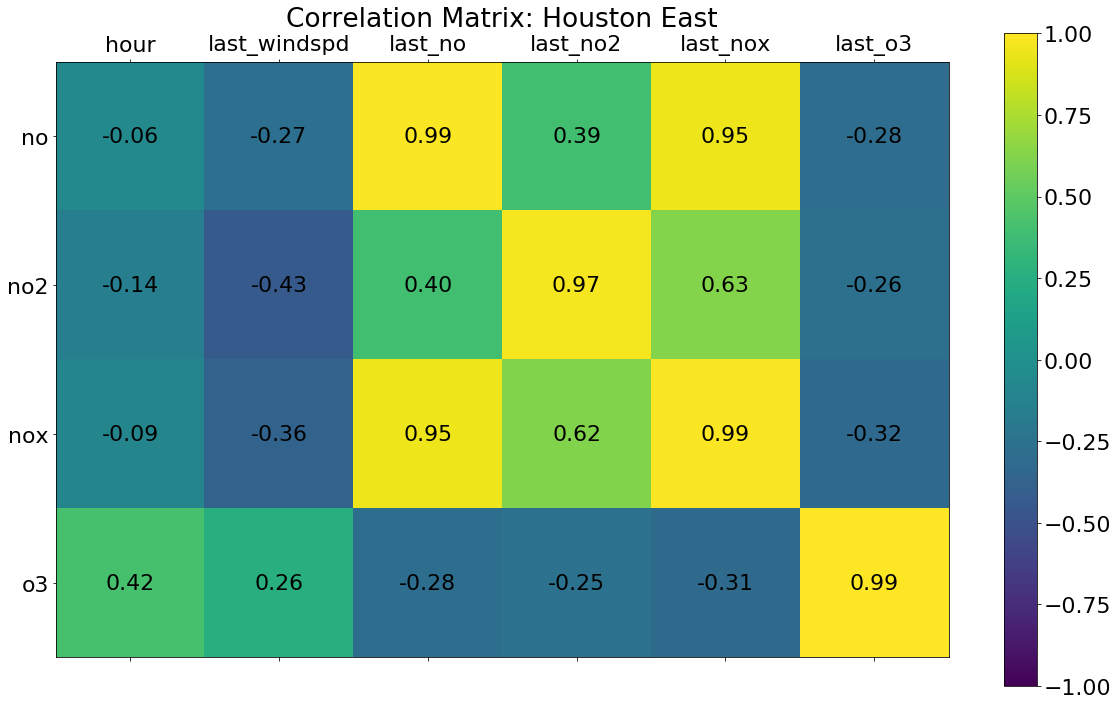

In [4]:
pols = ['no', 'no2', 'nox', 'o3']
features = ['hour', 'last_windspd', 'last_no', 'last_no2', 'last_nox', 'last_o3']

useful_cor = np.zeros((4, 6))

for idx, pol in enumerate(pols):
    names = features.copy()
    names.append(pol)
    correlations = data[names].corr()
    useful_cor[idx] = correlations[pol][0:6]

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(useful_cor, vmin=-1, vmax=1)
fig.colorbar(cax)

xticks = np.arange(0,len(features),1)
yticks = np.arange(0,len(pols),1)

for (i, j), z in np.ndenumerate(useful_cor):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(features)
ax.set_yticklabels(pols)
plt.title('Correlation Matrix: Houston East')
plt.show()